<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%9A%8C%EA%B7%802_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [34]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [7]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [37]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = y_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}')

MSE: 4.8326, RMSE: 2.1983


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [38]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [39]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'alpha가 {alpha}일 때 5 폴드의 평균 RMSE: {avg_rmse:.4f}')

alpha가 0일 때 5 폴드의 평균 RMSE: 2.2365
alpha가 0.1일 때 5 폴드의 평균 RMSE: 2.2249
alpha가 1일 때 5 폴드의 평균 RMSE: 2.2132
alpha가 10일 때 5 폴드의 평균 RMSE: 2.3481
alpha가 100일 때 5 폴드의 평균 RMSE: 2.5995


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [14]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [40]:
#모델 생성 및 훈련
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = y_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}')

MSE: 5.0313, RMSE: 2.2431


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: >

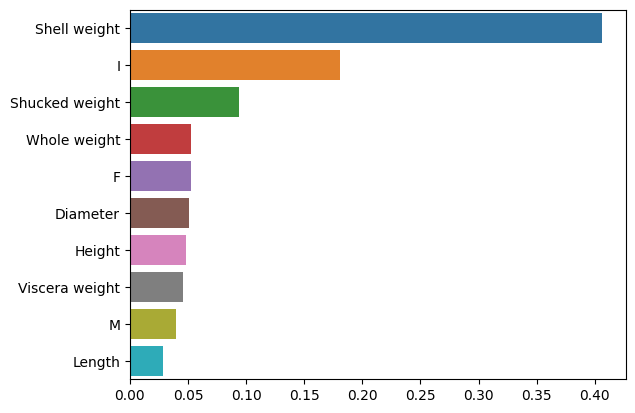

In [41]:
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data=xgb.feature_importances_, index=data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y = feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [42]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [43]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [44]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [45]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [27]:
#기울기
np.round(logistic.coef_, 2)

array([[-0.2 ,  0.37,  0.15, -0.19, -0.02,  0.2 ,  0.47, -0.02,  0.08,
         0.07, -0.02,  0.29,  0.01],
       [ 0.6 , -0.79, -0.13,  0.21, -0.01,  0.32,  0.36,  0.03,  0.28,
        -1.17,  0.26,  0.46, -0.01],
       [-0.4 ,  0.42, -0.02, -0.02,  0.03, -0.51, -0.82, -0.02, -0.36,
         1.1 , -0.24, -0.76,  0.  ]])

In [28]:
#절편
logistic.intercept_ 

array([-0.04177839,  0.0955105 , -0.05373211])

3-3) 모델의 정확도를 구하세요.

In [29]:
#모델의 예측값 구하기
y_pred = logistic.predict(x_test)

#모델의 정확도 구하기
metrics.accuracy_score(y_test, y_pred)

0.9629629629629629